### Q1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

images.shape: (1797, 8, 8)
data.shape: (1797, 64)
target.shape: (1797,)
data_manual.shape: (1797, 64)
Does manual flattening match digits.data? -> True


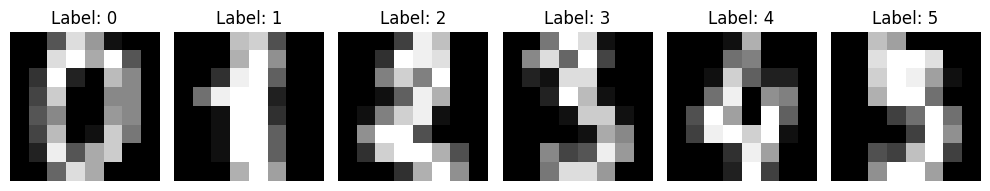

In [4]:
digits = datasets.load_digits()
images = digits.images          # (n_samples, 8, 8)
data_builtin = digits.data      # already flattened (n_samples, 64)
target = digits.target

print("images.shape:", images.shape)
print("data.shape:", data_builtin.shape)
print("target.shape:", target.shape)

# Manually flattening
n_samples = images.shape[0]
data_manual = images.reshape((n_samples, -1))
print("data_manual.shape:", data_manual.shape)
print("Does manual flattening match digits.data? ->", np.allclose(data_manual, data_builtin))

# Displaying some samples
fig, axes = plt.subplots(1,6, figsize=(10,3))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray', interpolation='nearest')
    ax.set_title(f"Label: {target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### Q2

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_manual, target, test_size=0.2, random_state=42, stratify=target)
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

# Q2b: Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Mean of scaled train features (approx):", np.mean(X_train_scaled, axis=0)[:5])
print("Std of scaled train features (approx):", np.std(X_train_scaled, axis=0)[:5])

X_train.shape: (1437, 64)
X_test.shape: (360, 64)
Mean of scaled train features (approx): [ 0.00000000e+00 -2.60519975e-16 -4.01364552e-17  1.51429167e-16
  2.99111235e-16]
Std of scaled train features (approx): [0. 1. 1. 1. 1.]


### Q3

In [6]:
model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)
model_ovr.fit(X_train_scaled, y_train)

y_train_pred = model_ovr.predict(X_train_scaled)
y_test_pred = model_ovr.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy:  {test_acc:.4f}")

Train accuracy: 0.9951
Test accuracy:  0.9694


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


### Q4

In [7]:
idx = 0
x_sample = X_test_scaled[idx].reshape(1,-1)
y_true = y_test[idx]
proba = model_ovr.predict_proba(x_sample).flatten()
print("Probability vector (length 10):")
print(np.round(proba, 4))
pred_class = np.argmax(proba)
print("\nPredicted class (highest prob):", pred_class)
print("True class:", y_true)

Probability vector (length 10):
[1.000e-04 0.000e+00 0.000e+00 0.000e+00 1.000e-04 6.764e-01 1.000e-04
 0.000e+00 2.000e-04 3.231e-01]

Predicted class (highest prob): 5
True class: 5


### Q5

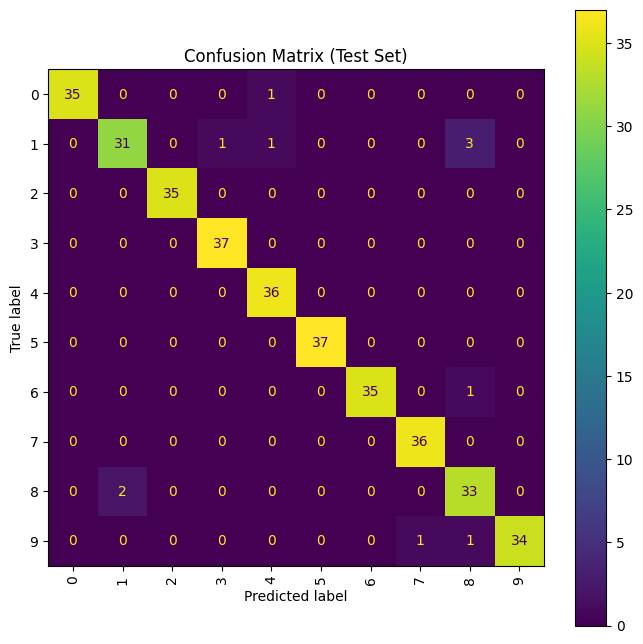

Top 3 most confused pairs (true -> predicted) and counts:
1 -> 8 : 3
8 -> 1 : 2
0 -> 4 : 1


In [9]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax, xticks_rotation='vertical')
plt.title("Confusion Matrix (Test Set)")
plt.show()

cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)
pairs = []
for true_label in range(cm_no_diag.shape[0]):
    for pred_label in range(cm_no_diag.shape[1]):
        count = cm_no_diag[true_label, pred_label]
        if count > 0:
            pairs.append(((true_label, pred_label), count))
pairs_sorted = sorted(pairs, key=lambda x: x[1], reverse=True)
print("Top 3 most confused pairs (true -> predicted) and counts:")
for i in range(min(3, len(pairs_sorted))):
    print(f"{pairs_sorted[i][0][0]} -> {pairs_sorted[i][0][1]} : {pairs_sorted[i][1]}")

### Q6

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

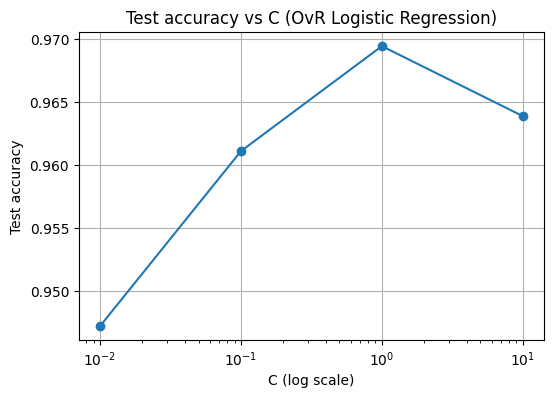

C=0.01: test accuracy = 0.9472
C=0.1: test accuracy = 0.9611
C=1: test accuracy = 0.9694
C=10: test accuracy = 0.9639


In [10]:
Cs = [0.01, 0.1, 1, 10]
test_accs = []
for C in Cs:
    m = LogisticRegression(C=C, multi_class='ovr', max_iter=1000, random_state=42)
    m.fit(X_train_scaled, y_train)
    test_accs.append(accuracy_score(y_test, m.predict(X_test_scaled)))

# Plot
plt.figure(figsize=(6,4))
plt.plot(Cs, test_accs, marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Test accuracy')
plt.title('Test accuracy vs C (OvR Logistic Regression)')
plt.grid(True)
plt.show()

for C, acc in zip(Cs, test_accs):
    print(f"C={C}: test accuracy = {acc:.4f}")

### Q7

In [13]:
# Default case
m_default = LogisticRegression(C=1, penalty='l2', solver='lbfgs', multi_class='ovr', max_iter=1000, random_state=42)
m_default.fit(X_train_scaled, y_train)
acc_default = accuracy_score(y_test, m_default.predict(X_test_scaled))

# Very large C cade
m_largeC = LogisticRegression(C=1e6, penalty='l2', solver='lbfgs', multi_class='ovr', max_iter=1000, random_state=42)
m_largeC.fit(X_train_scaled, y_train)
acc_largeC = accuracy_score(y_test, m_largeC.predict(X_test_scaled))

# No regularization case
try:
    m_none = LogisticRegression(penalty='none', solver='lbfgs', multi_class='ovr', max_iter=1000, random_state=42)
    m_none.fit(X_train_scaled, y_train)
    acc_none = accuracy_score(y_test, m_none.predict(X_test_scaled))
except Exception as e:
    acc_none = None
    print("Could not train penalty='none' with lbfgs in this sklearn version:", e)

print(f"Default (C=1, L2) test acc: {acc_default:.4f}")
print(f"Very large C=1e6 test acc:       {acc_largeC:.4f}")
print(f"No regularization (penalty='none') test acc: {acc_none}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Could not train penalty='none' with lbfgs in this sklearn version: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'l2', 'elasticnet'} or None. Got 'none' instead.
Default (C=1, L2) test acc: 0.9694
Very large C=1e6 test acc:       0.9417
No regularization (penalty='none') test acc: None


In [14]:
#using the model of the prev cell

W = model_ovr.coef_      # shape (n_classes, n_features)
b = model_ovr.intercept_ # shape (n_classes,)

# Choose the same sample (index idx)
x = X_test_scaled[idx]   # 1D array
z = W.dot(x) + b         # raw scores for each of the 10 binary classifiers
sigmoid = lambda t: 1.0 / (1.0 + np.exp(-t))
pks = sigmoid(z)
pks_norm = pks / np.sum(pks)

print("Raw scores z_k:")
print(np.round(z, 4))
print("\nSigmoid p_k (OvR outputs, not summing to 1 necessarily):")
print(np.round(pks, 6))
print("\nNormalized probabilities (sum to 1):")
print(np.round(pks_norm, 6))
print("\nSklearn predict_proba vector:")
print(np.round(model_ovr.predict_proba(x.reshape(1,-1)).flatten(), 6))

print("\nSums -> Sigmoid sum:", np.sum(pks), "Normalized sum:", np.sum(pks_norm))

Raw scores z_k:
[ -9.0507 -16.4975 -17.1747 -12.3949  -9.2096   4.1515  -8.6846 -14.6999
  -8.0302  -0.1188]

Sigmoid p_k (OvR outputs, not summing to 1 necessarily):
[1.17000e-04 0.00000e+00 0.00000e+00 4.00000e-06 1.00000e-04 9.84504e-01
 1.69000e-04 0.00000e+00 3.25000e-04 4.70346e-01]

Normalized probabilities (sum to 1):
[8.10000e-05 0.00000e+00 0.00000e+00 3.00000e-06 6.90000e-05 6.76372e-01
 1.16000e-04 0.00000e+00 2.24000e-04 3.23136e-01]

Sklearn predict_proba vector:
[8.10000e-05 0.00000e+00 0.00000e+00 3.00000e-06 6.90000e-05 6.76372e-01
 1.16000e-04 0.00000e+00 2.24000e-04 3.23136e-01]

Sums -> Sigmoid sum: 1.455566030697297 Normalized sum: 1.0
